In [2]:
!pip install ucimlrepo

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

#Датасет "Фишинговые сайты"#

##Описание датасета с сайта##  
Одной из проблем, с которой столкнулось наше исследование, было отсутствие надежных обучающих наборов данных. Фактически, с этой проблемой сталкивается любой исследователь в данной области. Однако, несмотря на большое количество статей о прогнозировании фишинговых сайтов с помощью методов интеллектуального анализа данных, ни одна надежная обучающая база данных не была опубликована публично, возможно, потому, что в литературе нет согласия по поводу определенных признаков, характеризующих фишинговые сайты, и поэтому трудно сформировать базу данных, которая охватывала бы все возможные признаки.

In [4]:
phishing_websites = fetch_ucirepo(id=327)
print(phishing_websites.metadata)

{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'published_in': 'International Conference for Internet Technology and Secured Tr

In [5]:
df = phishing_websites['data']['features']
df['target'] = phishing_websites.data.targets

##Статическая информация о наборе данных##

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int64
 14  links_

In [7]:
df.describe()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,target
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Названия признаков##

In [9]:
df.columns

Index(['having_ip_address', 'url_length', 'shortining_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_sub_domain', 'sslfinal_state', 'domain_registration_length',
       'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'rightclick', 'popupwindow', 'iframe',
       'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank',
       'google_index', 'links_pointing_to_page', 'statistical_report',
       'target'],
      dtype='object')

In [12]:
df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,target
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Из информации представленной выше можно сделать вывод что все данные в датасете представлены исключительно числовыми значениями.
А так же в датасете нет записей с пропущенной информацией.

##Визуализация данных##

###Визуализация для каждого признака###

Признаков представленно 31, потому графиков получится много. Пояснения будут добавлены не ко всем признакам.

In [46]:
#Функция для отображения двух графиков признака в одном изображении
def showGraphicsForSingleFeuture(columnName):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  df[columnName].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
  axes[0].set_title('Pie Chart')

  sns.countplot(x=df[columnName], ax=axes[1])
  axes[1].set_title('Countplot')

  plt.tight_layout()
  plt.show()

Целевой признак:  
"1" - сайт является фишинговым  
"-1" - сайт не является фишинговым

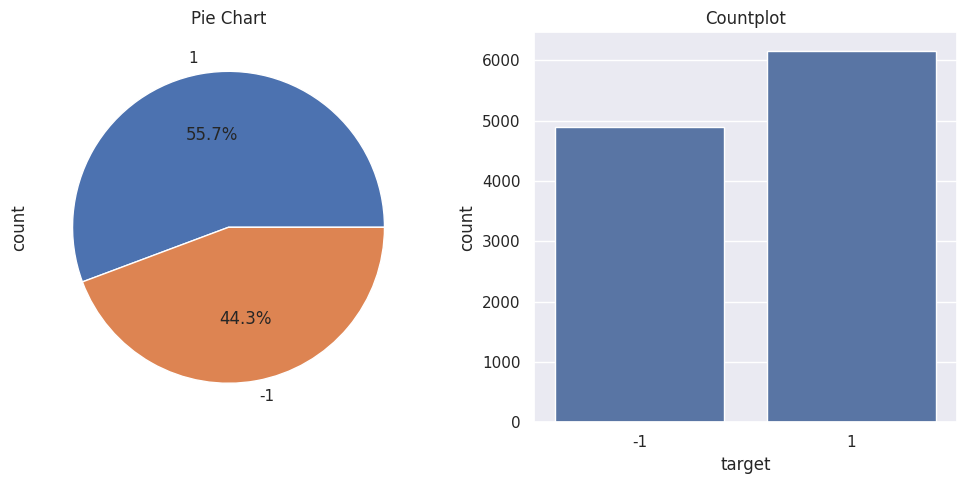

In [47]:
showGraphicsForSingleFeuture('target')

Если в качестве альтернативы доменному имени в URL используется IP-адрес, например «http://125.98.3.123/fake.html», пользователи могут быть уверены, что кто-то пытается украсть их личную информацию. Иногда IP-адрес даже преобразуется в шестнадцатеричный код.

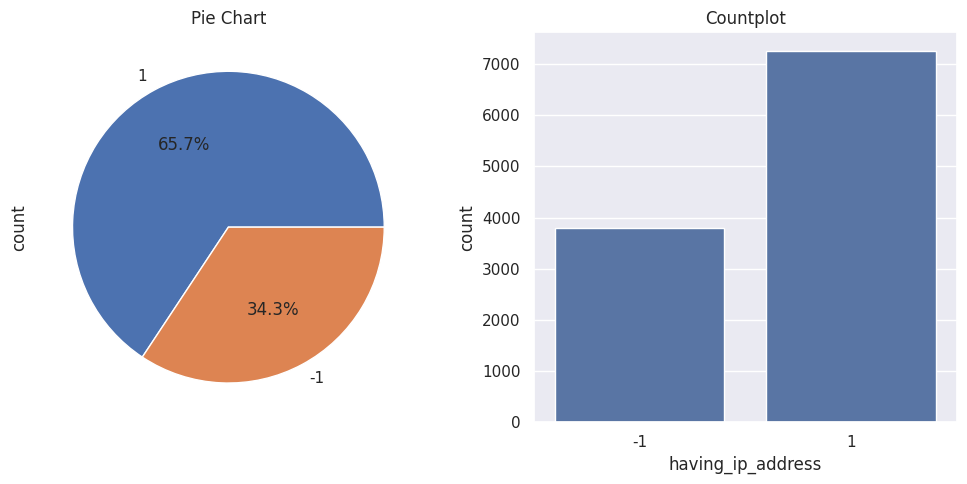

In [48]:
showGraphicsForSingleFeuture('having_ip_address')

Призак длины url:  
"1" - длина до 54 символов  
"0" - длина от 54 до 75  
"-1" - длина от 75 символов

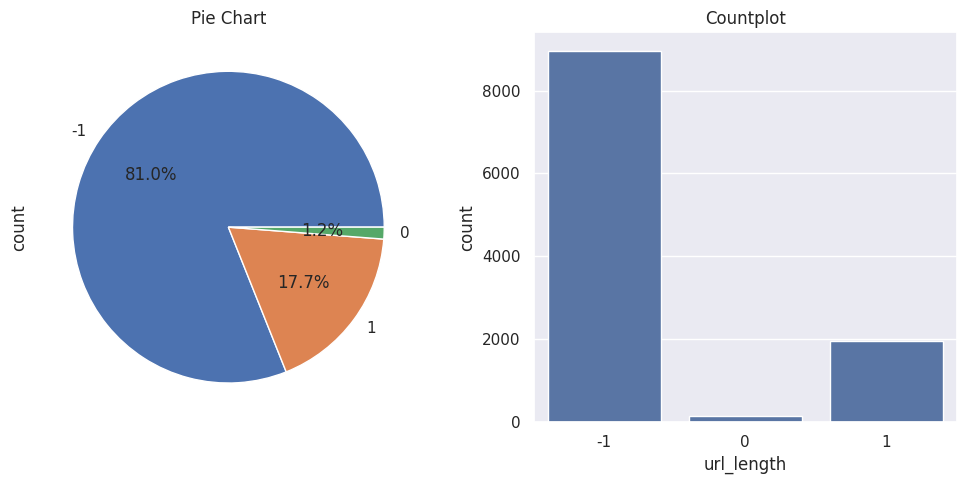

In [49]:
showGraphicsForSingleFeuture('url_length')

Сокращение URL-адресов - это метод во «всемирной паутине», при котором URL-адрес может быть значительно меньше по длине и при этом вести на нужную веб-страницу. Это достигается с помощью «HTTP-перенаправления» на короткое доменное имя, которое ссылается на веб-страницу, имеющую длинный URL.

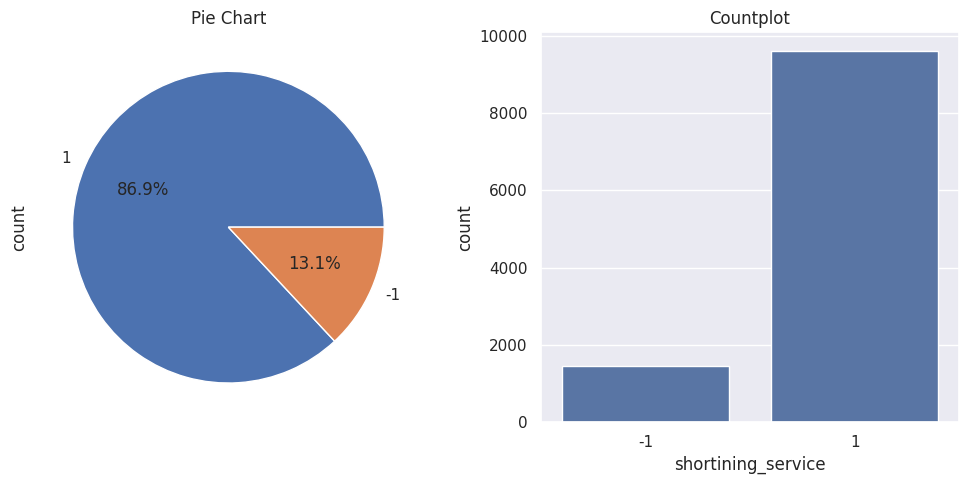

In [50]:
showGraphicsForSingleFeuture('shortining_service')

Признак having_at_symbol отвечает за наличие символа "@" в url.

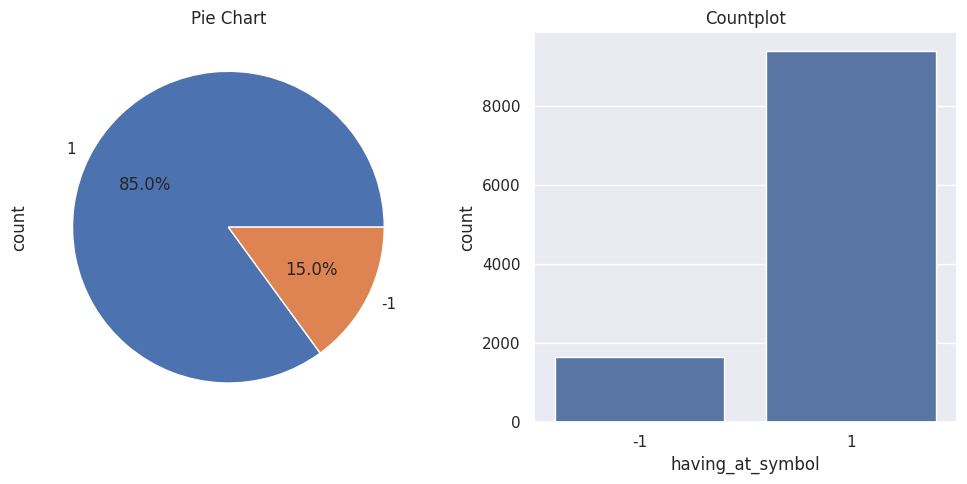

In [51]:
showGraphicsForSingleFeuture('having_at_symbol')

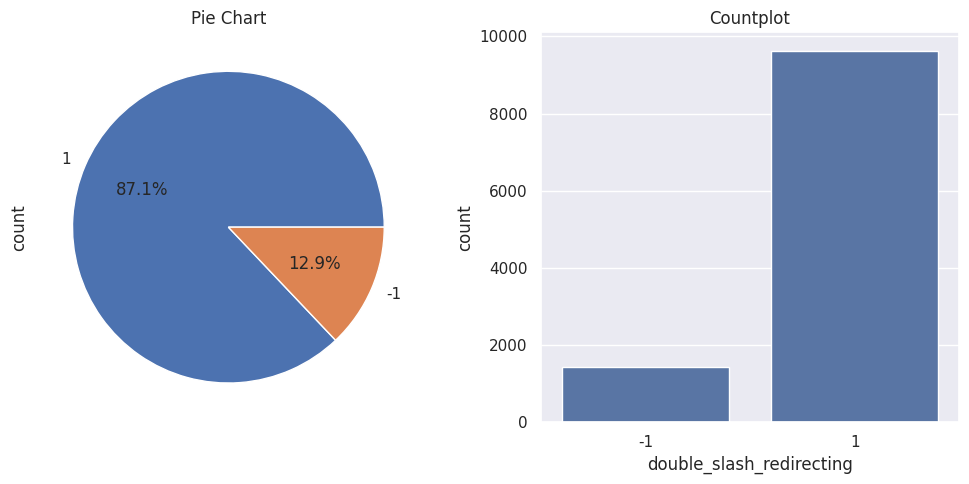

In [52]:
showGraphicsForSingleFeuture('double_slash_redirecting')

Символ тире редко используется в легальных URL. Фишеры обычно добавляют к доменному имени префиксы или суффиксы, разделенные знаком (-), чтобы у пользователей создалось впечатление, что они имеют дело с легитимной веб-страницей.

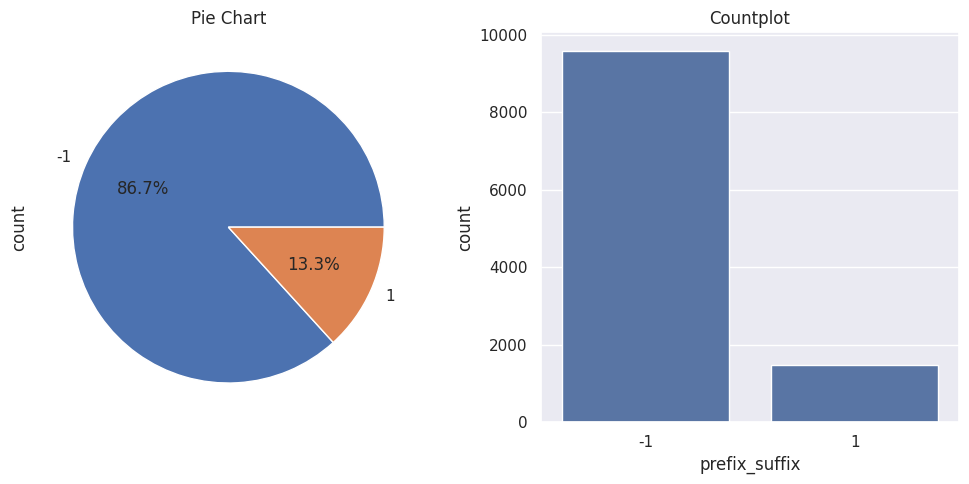

In [53]:
showGraphicsForSingleFeuture('prefix_suffix')

Признак поддоменов:  
"1" - 1 точка в доменной части   
"0" - 2 точки    
"-1" - более двух точек  

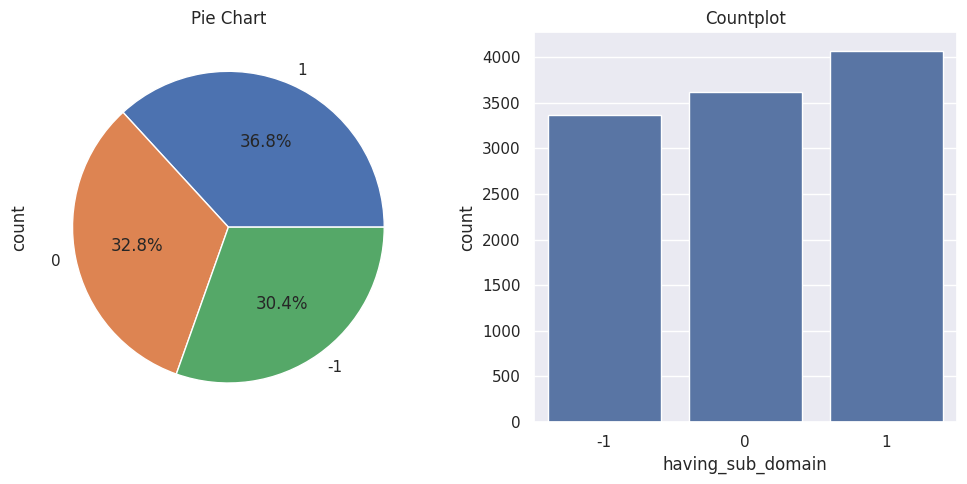

In [54]:
showGraphicsForSingleFeuture('having_sub_domain')

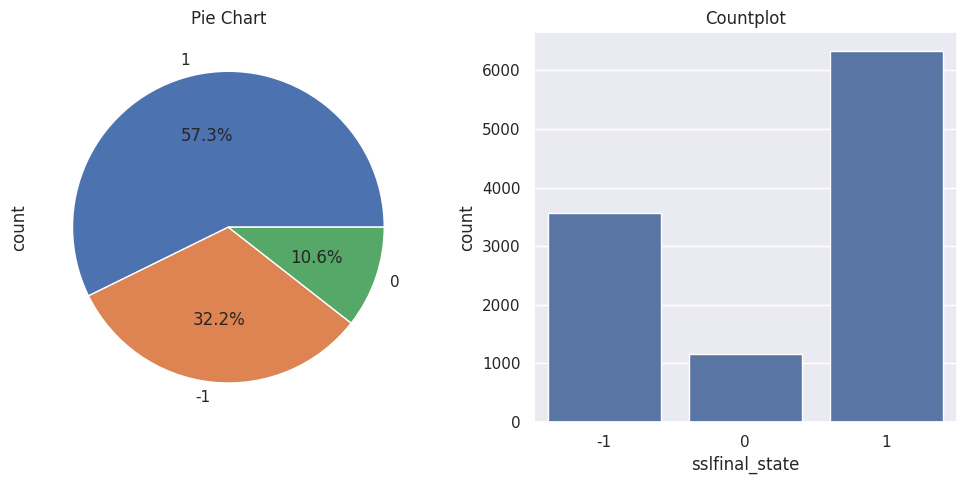

In [55]:
showGraphicsForSingleFeuture('sslfinal_state')

Признак длительности регистрации домена  
"1" - более 1 года  
"-1" - до 1 года

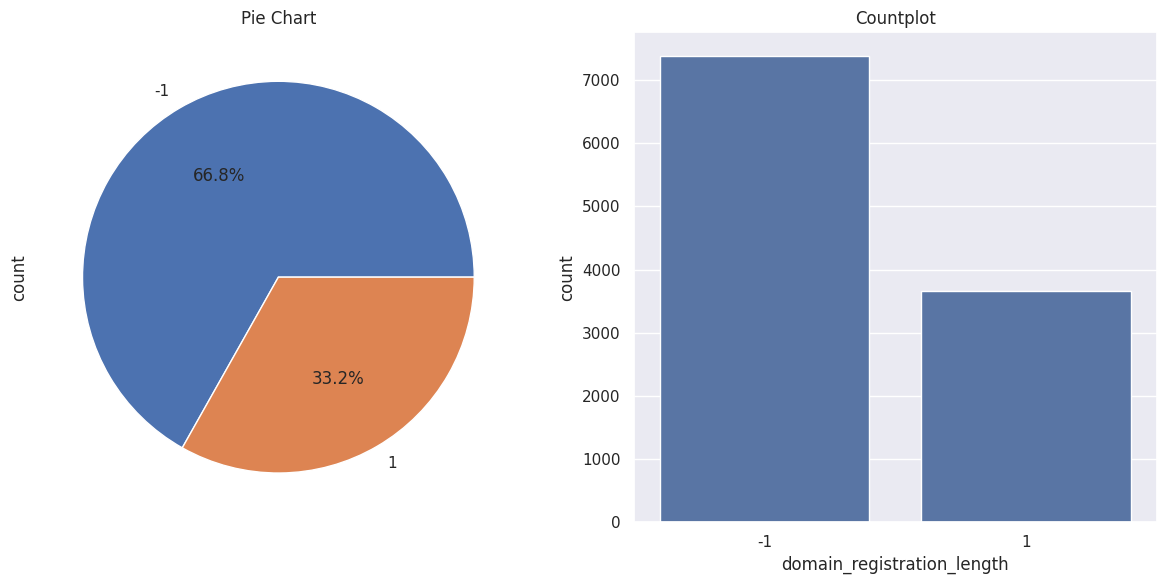

In [38]:
showGraphicsForSingleFeuture('domain_registration_length')

Favicon - это графическое изображение (иконка), связанное с определенной веб-страницей. Многие существующие агенты пользователя, такие как графические браузеры и программы для чтения новостей, отображают favicon в качестве визуального напоминания об идентичности веб-сайта в адресной строке. Если favicon загружается с домена, отличного от того, который отображается в адресной строке, то веб-страница, скорее всего, будет расценена как попытка фишинга.

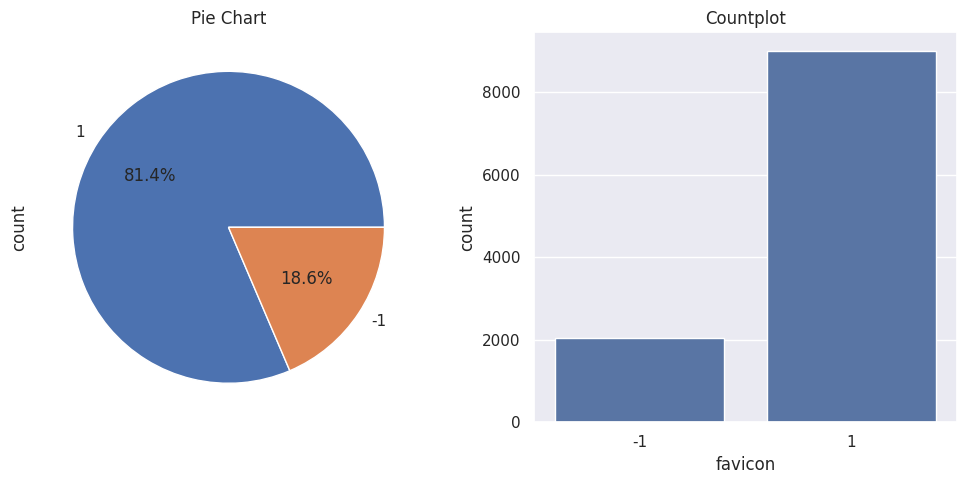

In [56]:
showGraphicsForSingleFeuture('favicon')

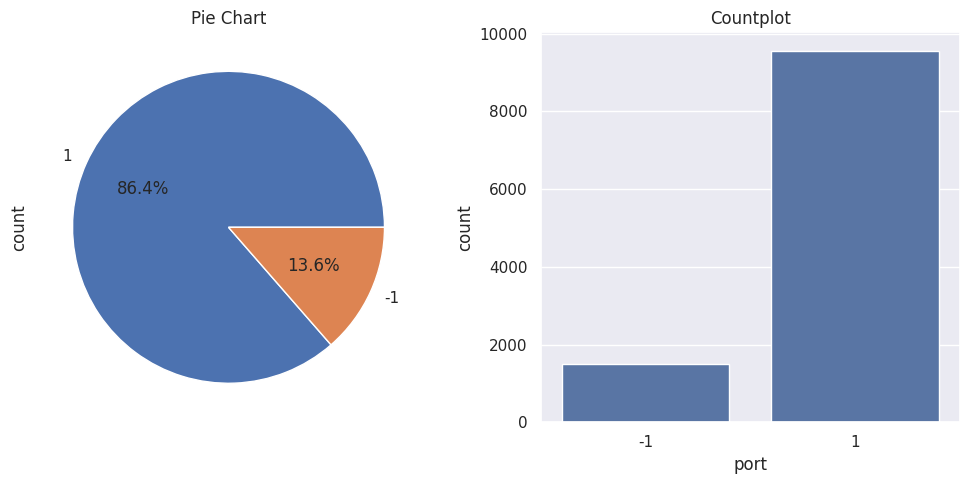

In [57]:
showGraphicsForSingleFeuture('port')

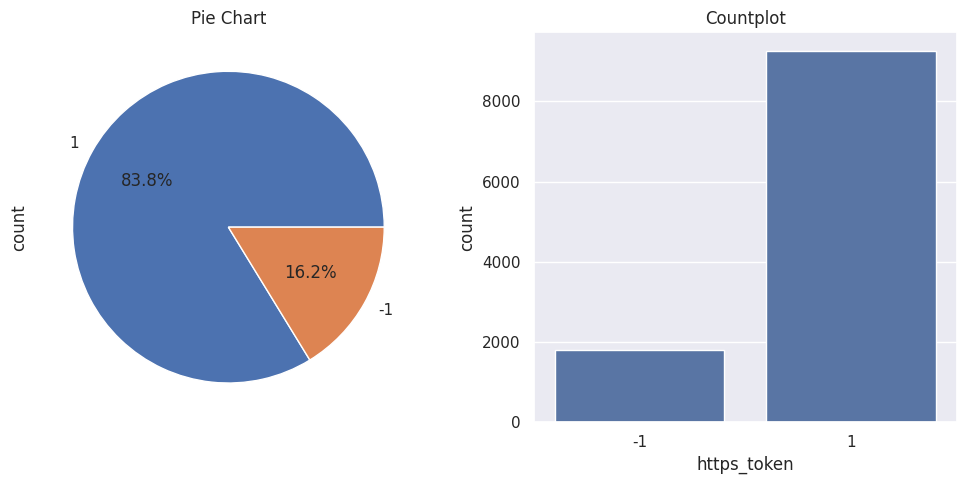

In [58]:
showGraphicsForSingleFeuture('https_token')

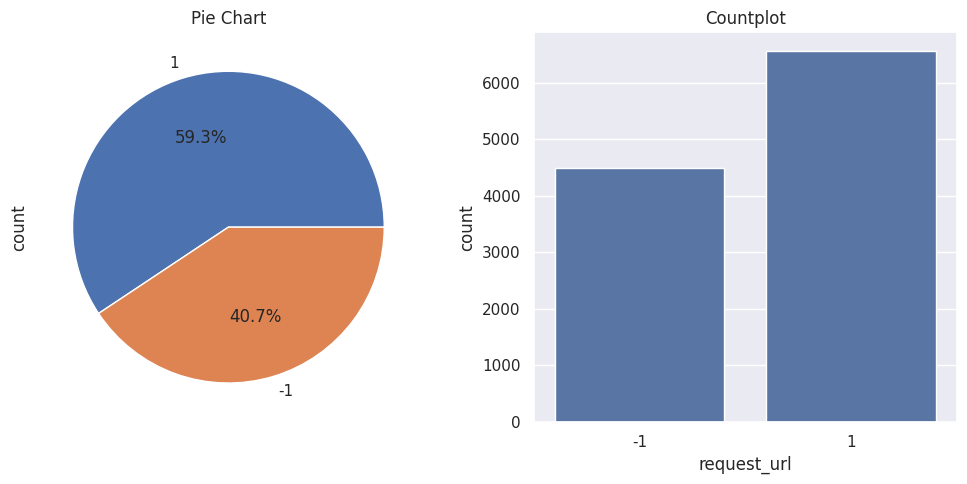

In [59]:
showGraphicsForSingleFeuture('request_url')

Anchor - это элемент, определяемый тегом a.
Эта функция обрабатывается точно так же, как Request URL».

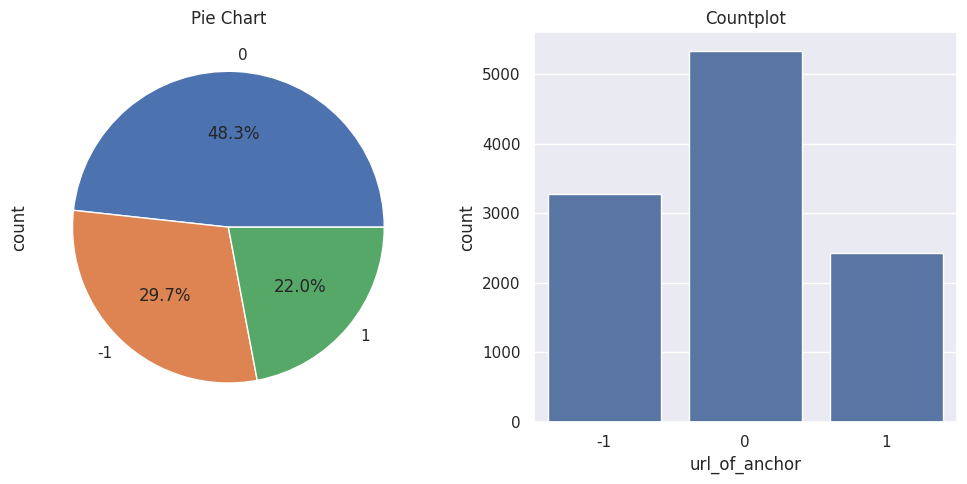

In [60]:
showGraphicsForSingleFeuture('url_of_anchor')

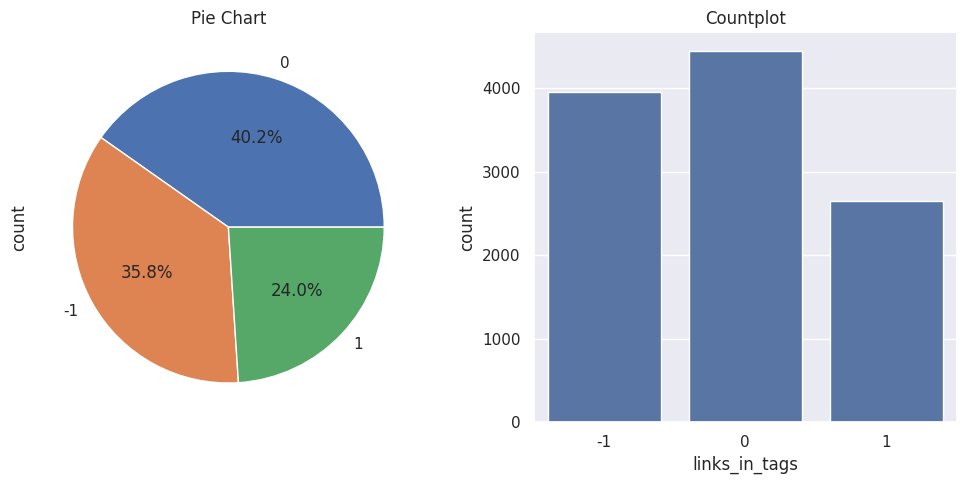

In [61]:
showGraphicsForSingleFeuture('links_in_tags')

SFH, содержащие пустую строку или «about:blank», считаются сомнительными, поскольку с представленной информацией должно быть выполнено какое-либо действие. Кроме того, если доменное имя в SFHs отличается от доменного имени веб-страницы, это говорит о том, что веб-страница является подозрительной, поскольку представленная информация редко обрабатывается внешними доменами.

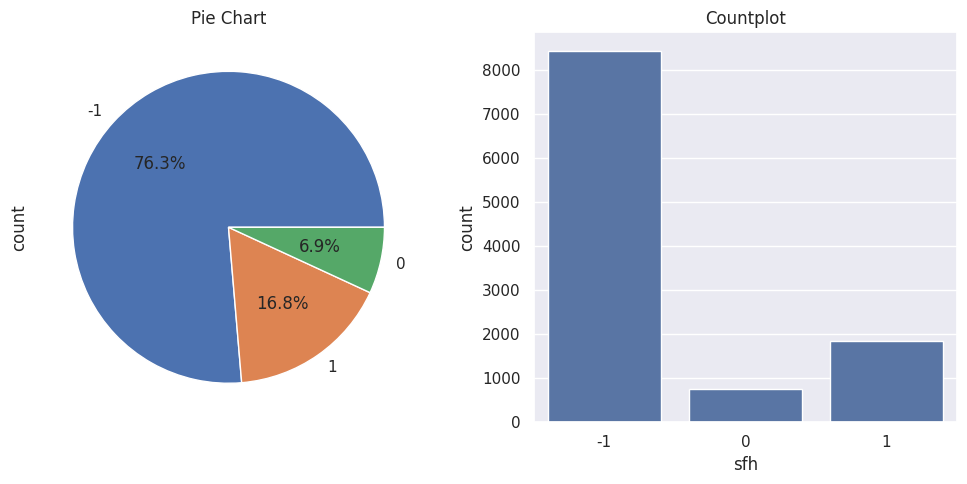

In [62]:
showGraphicsForSingleFeuture('sfh')

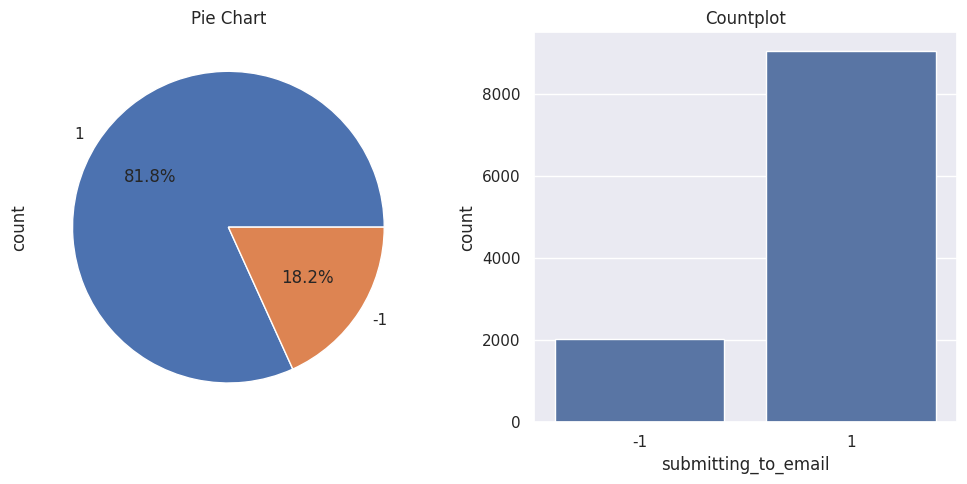

In [63]:
showGraphicsForSingleFeuture('submitting_to_email')

Эта характеристика может быть извлечена из базы данных WHOIS. Для легитимного веб-сайта идентификация обычно является частью его URL-адреса.


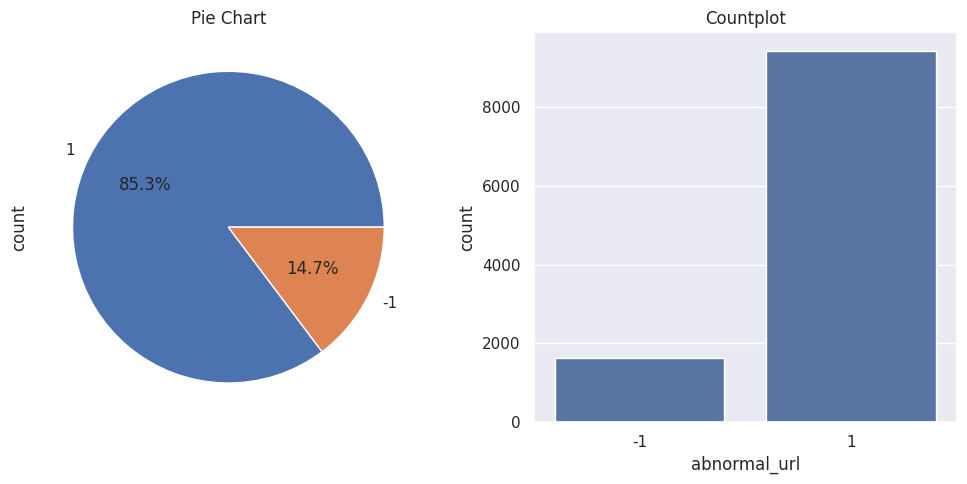

In [64]:
showGraphicsForSingleFeuture('abnormal_url')

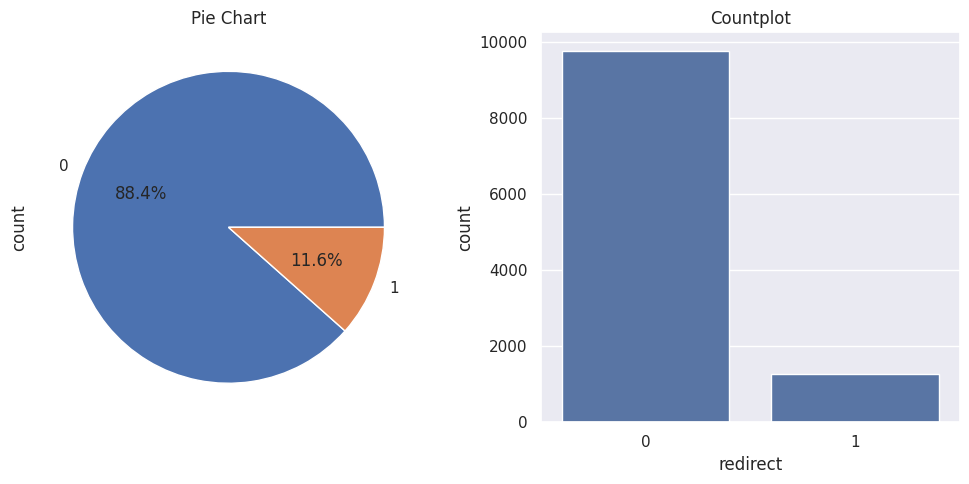

In [65]:
showGraphicsForSingleFeuture('redirect')

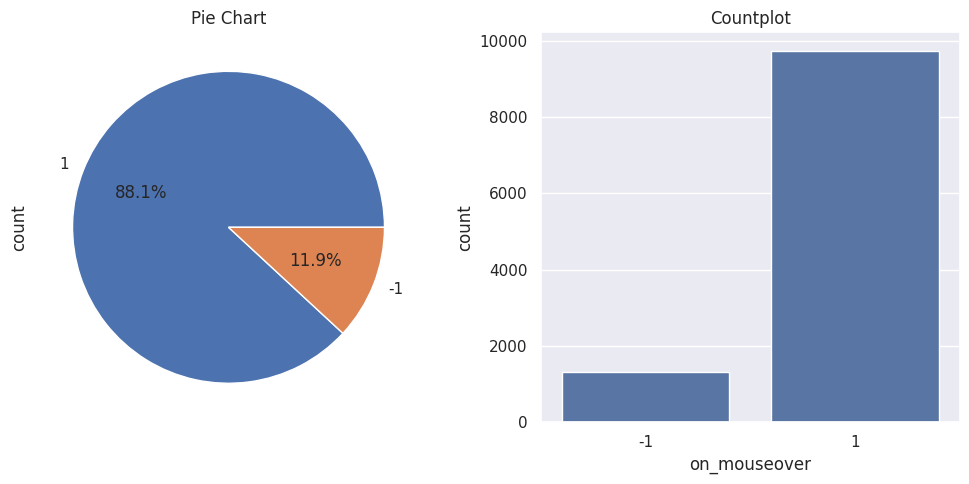

In [66]:
showGraphicsForSingleFeuture('on_mouseover')

Фишеры используют JavaScript для отключения функции правой кнопки мыши, чтобы пользователи не могли просматривать и сохранять исходный код веб-страницы.

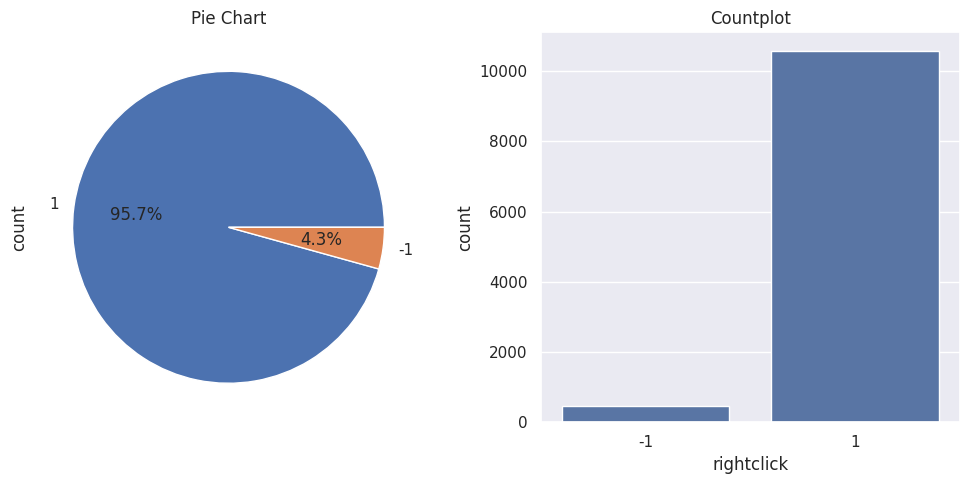

In [67]:
showGraphicsForSingleFeuture('rightclick')

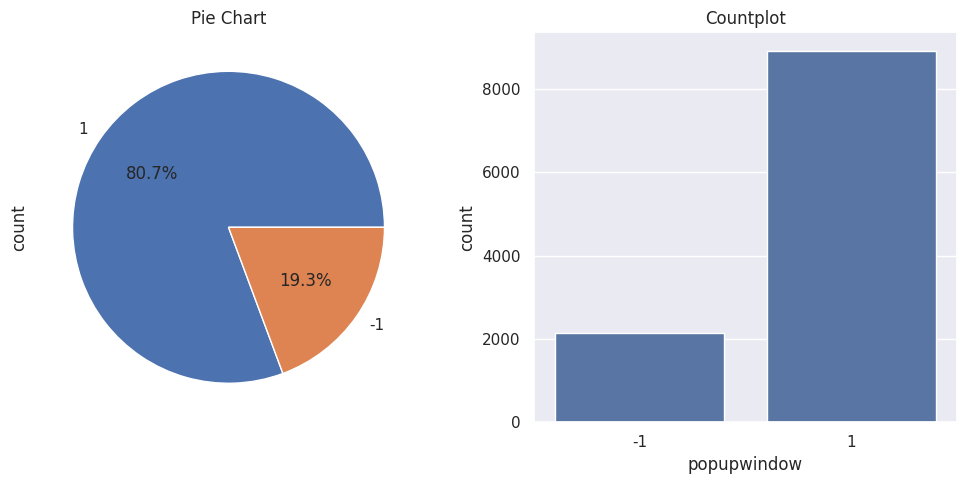

In [68]:
showGraphicsForSingleFeuture('popupwindow')

IFrame - это HTML-тег, используемый для отображения дополнительной веб-страницы в той, которая отображается в данный момент. Фишеры могут использовать тег «iframe» и сделать его невидимым, то есть без границ фрейма. Для этого фишеры используют атрибут «frameBorder», который заставляет браузер отображать визуальную границу.


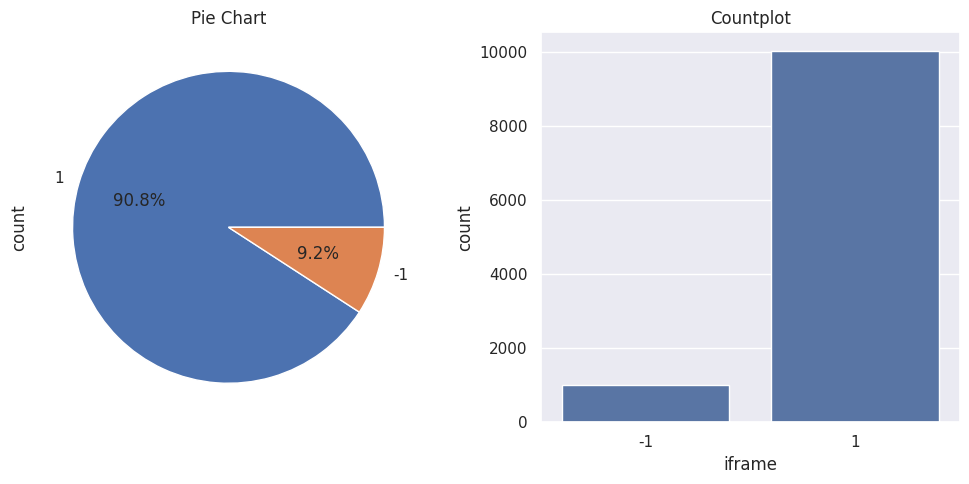

In [69]:
showGraphicsForSingleFeuture('iframe')

Большинство фишинговых сайтов существуют в течение короткого периода времени. Проанализировав набор данных, авторы посчитали, что минимальный возраст легитимного домена составляет 6 месяцев.

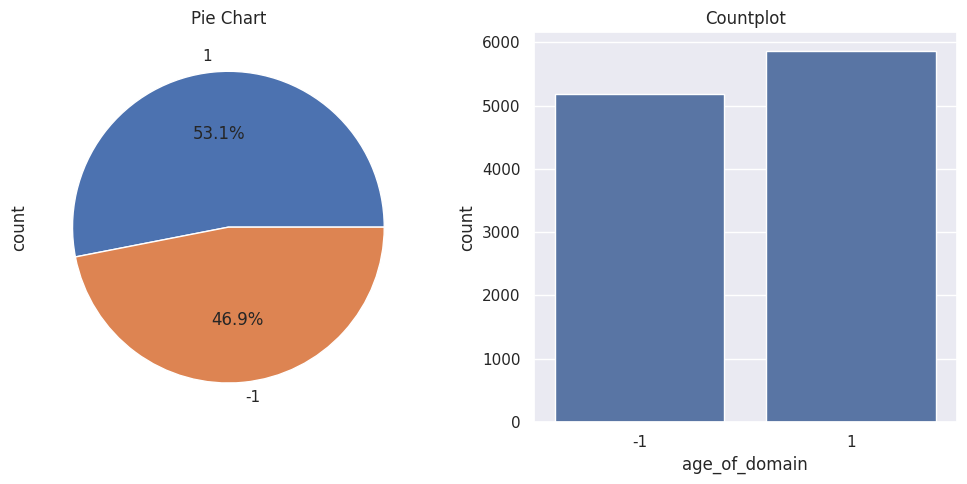

In [70]:
showGraphicsForSingleFeuture('age_of_domain')

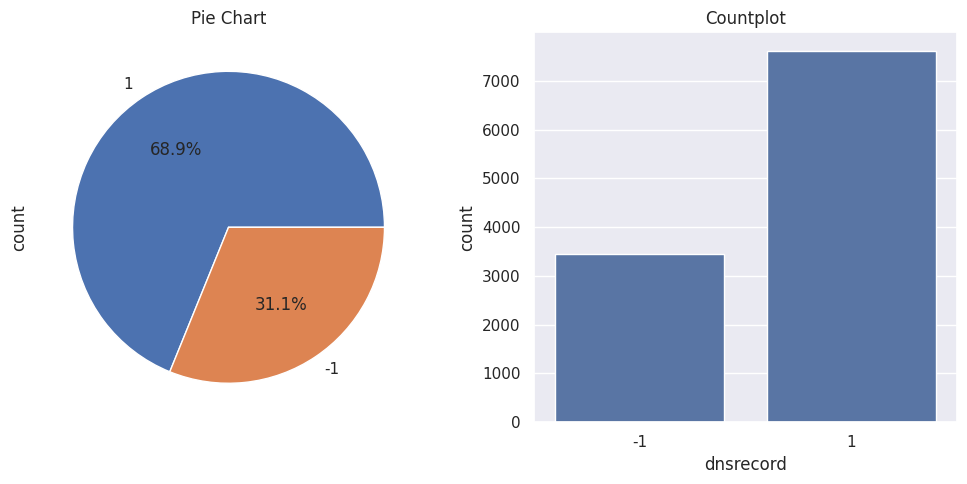

In [71]:
showGraphicsForSingleFeuture('dnsrecord')

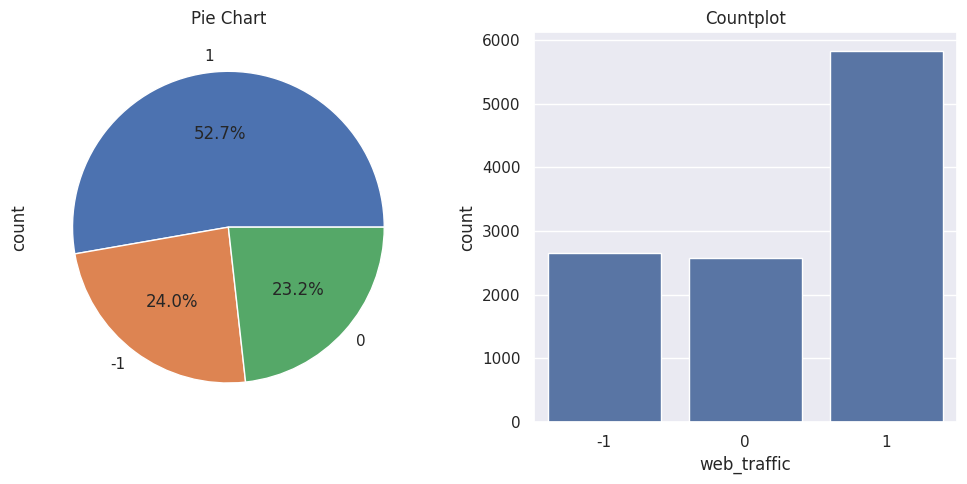

In [72]:
showGraphicsForSingleFeuture('web_traffic')

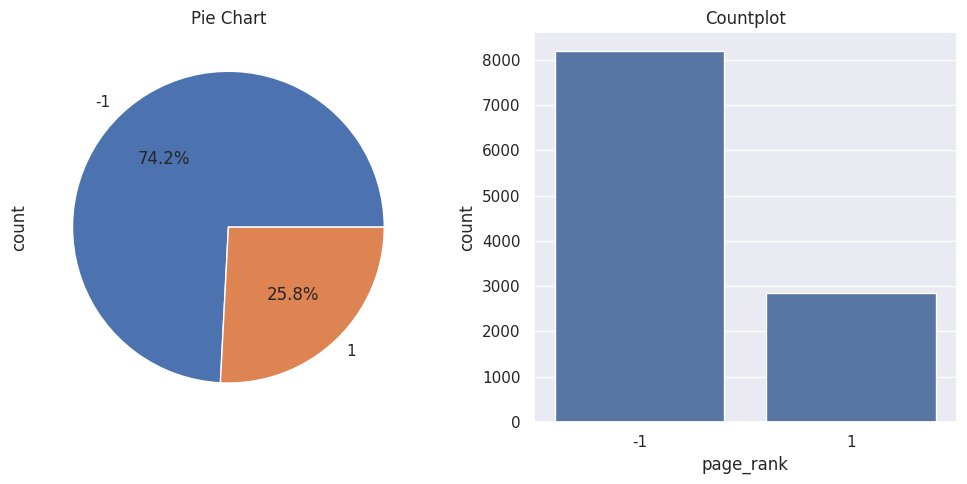

In [73]:
showGraphicsForSingleFeuture('page_rank')

Эта функция определяет, находится ли сайт в индексе Google или нет. Когда сайт проиндексирован Google, он отображается в результатах поиска. Обычно фишинговые веб-страницы доступны лишь в течение короткого периода времени, поэтому многие фишинговые веб-страницы могут не попасть в индекс Google.

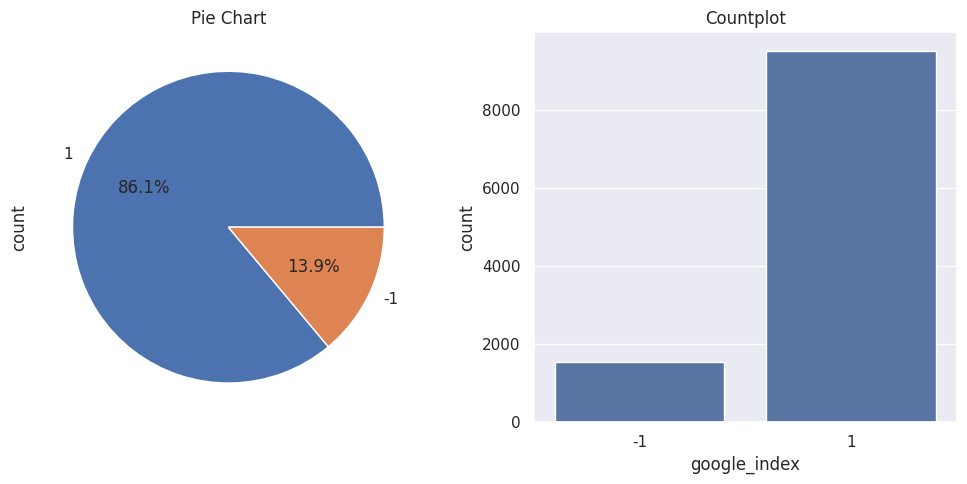

In [74]:
showGraphicsForSingleFeuture('google_index')

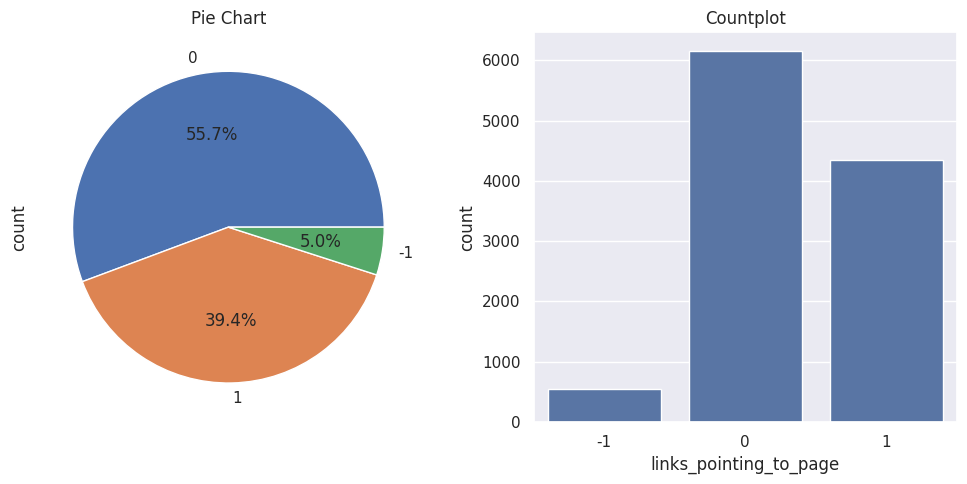

In [75]:
showGraphicsForSingleFeuture('links_pointing_to_page')

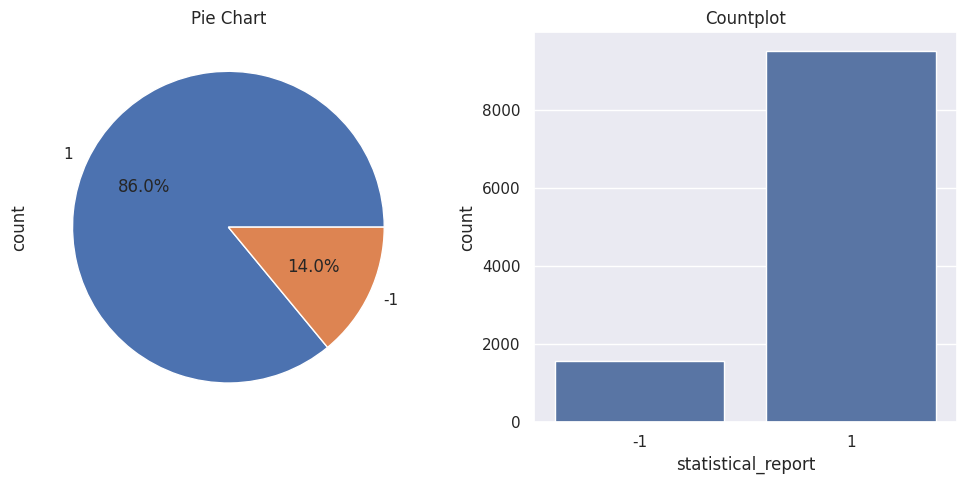

In [76]:
showGraphicsForSingleFeuture('statistical_report')

###Групповые визуализации###

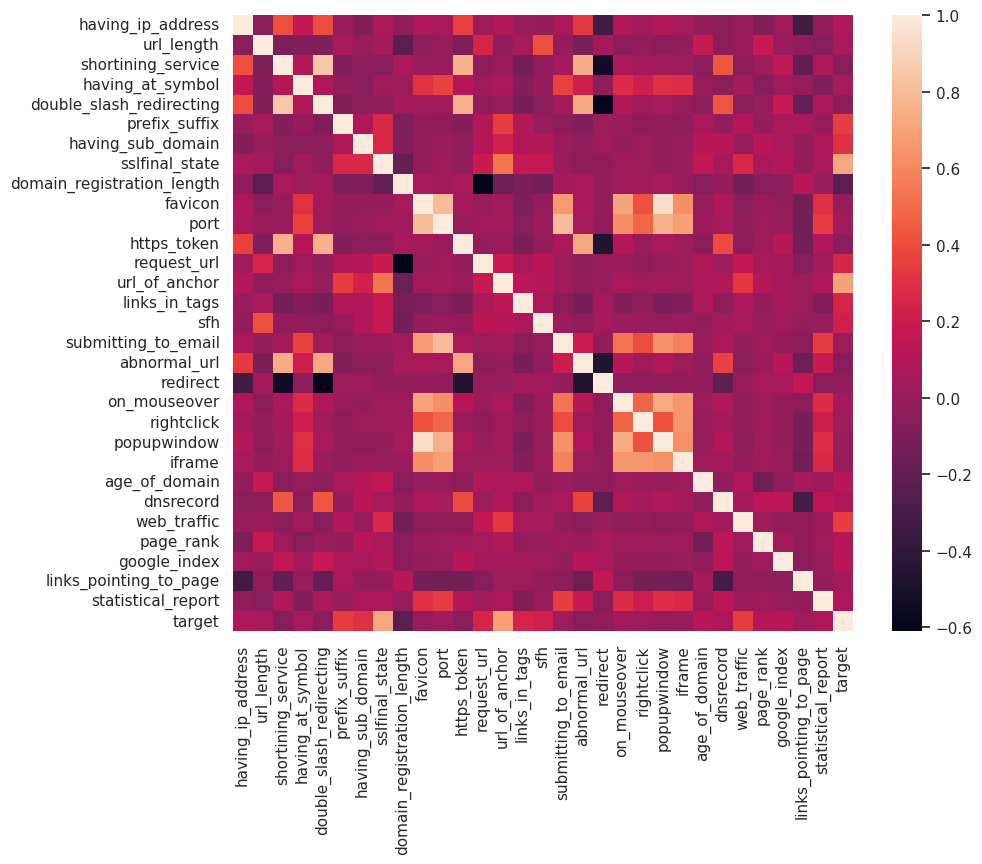

In [82]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True))

plt.show()

Из данного графика можно сделать вывод о том, что самымми влиятельными признаками оказались: url_of_anchor, sslfinal_state, prefix_suffix.  
Так же видна сильная зависимость между признаками popupwindow и favicon.

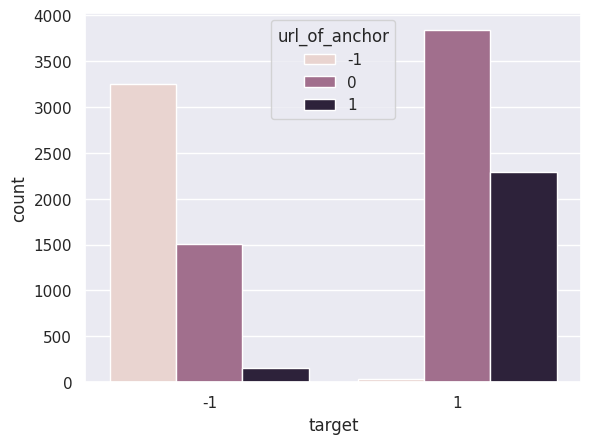

In [84]:
sns.countplot(data=df, x="target", hue='url_of_anchor');

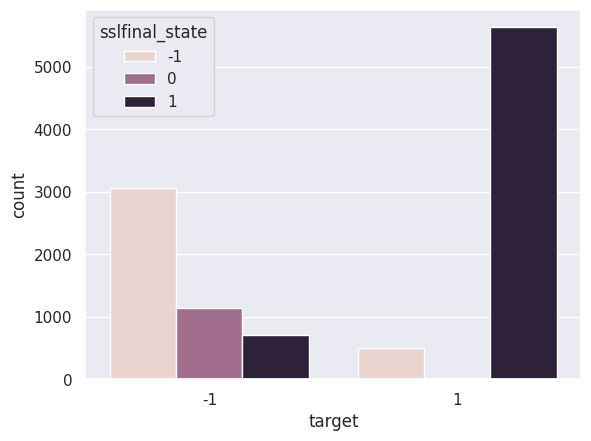

In [85]:
sns.countplot(data=df, x="target", hue='sslfinal_state');

<Axes: xlabel='target', ylabel='count'>

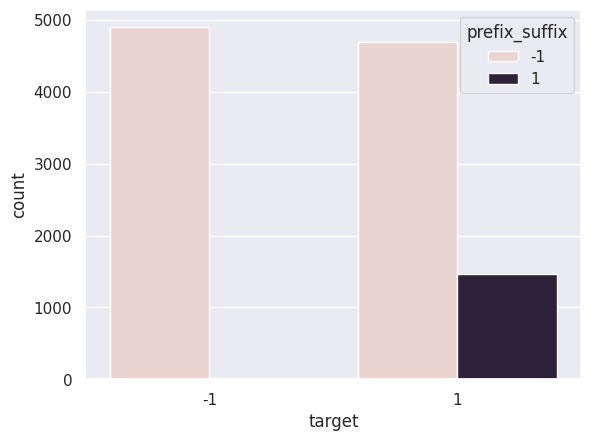

In [86]:
sns.countplot(data=df, x="target", hue='prefix_suffix')